In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_excel("trainingtestingset_latest.xlsx")
df.head()


,id,taxi_AB,bus_AB,bike_AB,taxi_BC,bus_BC,bike_BC,taxi_CD,bus_CD,bike_CD,traffic_AB,traffic_BC,traffic_CD
0,0,15,15,10,7,13,11,12,20,13,1,2,1
1,1,8,12,15,15,11,12,8,11,9,1,2,2
2,2,12,13,17,8,20,12,7,17,13,2,2,2
3,3,6,17,16,13,10,14,14,18,16,1,2,2
4,4,8,15,9,9,12,8,12,10,15,1,1,2


In [4]:
def find_best_mode_combo(row):
    min_time = float('inf')
    best_combo = None
    for combo in product(['taxi', 'bus', 'bike'], repeat=3):
        total_time = (
            row[f'{combo[0]}_AB'] +
            row[f'{combo[1]}_BC'] +
            row[f'{combo[2]}_CD']
        )
        if total_time < min_time:
            min_time = total_time
            best_combo = combo
    return '->'.join(best_combo)

df['best_combo'] = df.apply(find_best_mode_combo, axis=1)


In [5]:
feature_cols = [
    'taxi_AB', 'bus_AB', 'bike_AB',
    'taxi_BC', 'bus_BC', 'bike_BC',
    'taxi_CD', 'bus_CD', 'bike_CD',
    'traffic_AB', 'traffic_BC', 'traffic_CD'
]

X = df[feature_cols]
y = df['best_combo']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=75, random_state=42)


In [6]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.48
Classification Report:
                   precision    recall  f1-score   support

bike->bike->bike       0.00      0.00      0.00         1
bike->taxi->bike       0.00      0.00      0.00         1
bike->taxi->taxi       0.00      0.00      0.00         4
 bus->bike->taxi       0.00      0.00      0.00         1
taxi->bike->bike       0.00      0.00      0.00         1
 taxi->bike->bus       1.00      0.33      0.50         3
taxi->bike->taxi       0.00      0.00      0.00         3
 taxi->bus->bike       0.00      0.00      0.00         0
 taxi->bus->taxi       0.33      1.00      0.50         1
taxi->taxi->bike       1.00      1.00      1.00         1
 taxi->taxi->bus       0.00      0.00      0.00         0
taxi->taxi->taxi       0.60      1.00      0.75         9

        accuracy                           0.48        25
       macro avg       0.24      0.28      0.23        25
    weighted avg       0.39      0.48      0.39        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

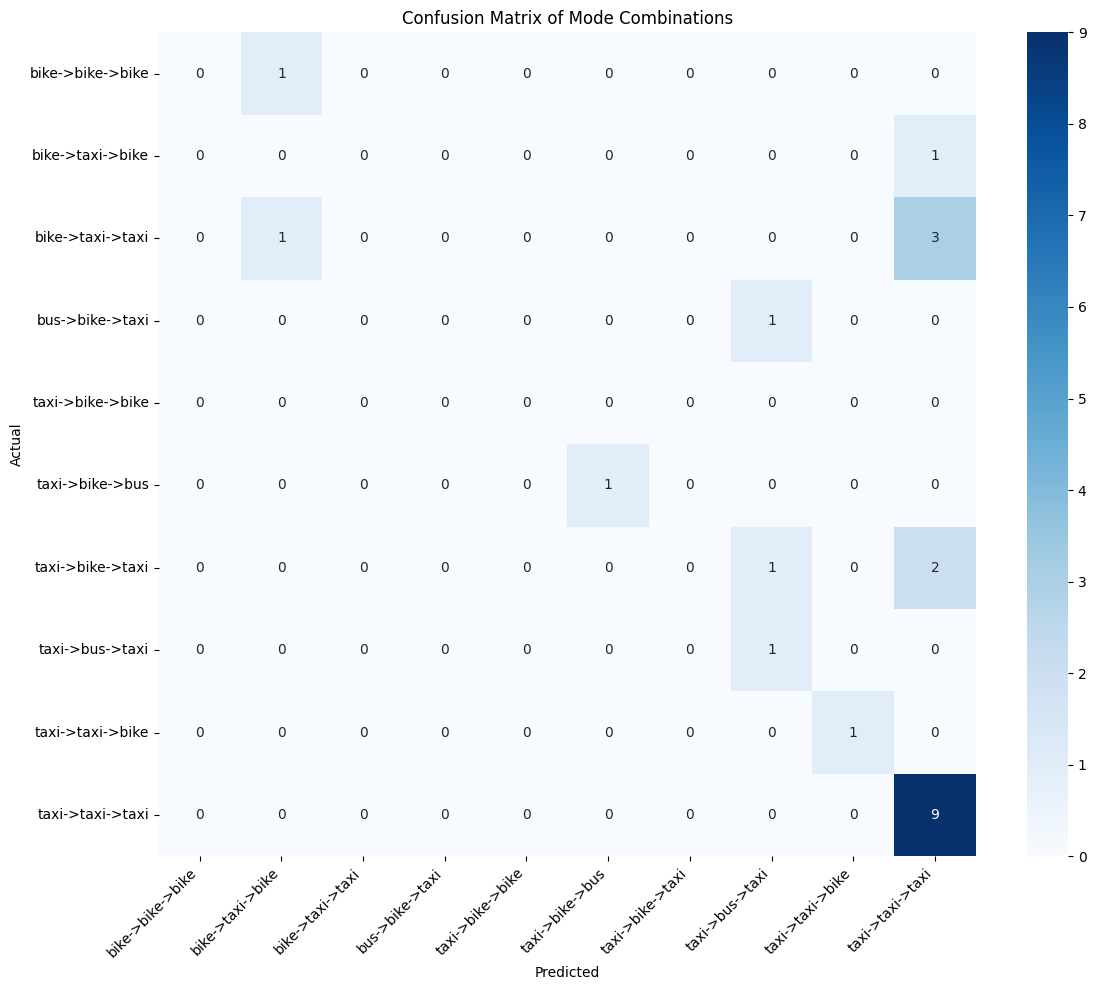

In [8]:
labels_sorted = sorted(y_test.unique().tolist())
cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels_sorted, yticklabels=labels_sorted, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Mode Combinations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
